In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-79.64019633099623 58.91473745251943
4.890467209219878 173.88686560623302
60.862495103469485 -11.830469920657663
-4.6606821746253075 -50.38924976603258
-25.187421063709238 171.38164919777773
16.90200355655834 40.0091327301802
81.63856690732842 66.17056055737237
64.70110544438896 52.50084601230691
-29.154903650358968 -62.445181257623645
-89.42388493829236 -97.62642588283455
58.621506936058864 74.80702072798172
72.31481337367595 -33.39515259936633
-50.911425364514905 -169.7227101026312
8.184308432710623 -179.18243762771513
-15.072983489768788 157.05753794280554
10.25651961119543 117.44026090246797
-34.748298801153645 -12.44194144458882
77.43239852429883 -142.5690961874962
-63.42939403395142 53.64990442207238
43.72346912765951 -48.386916394165155
-61.29317754628812 27.368981811261364
70.79752608770679 139.5379889739553
-28.005977469709727 -149.0201272312396
60.379835953000594 -19.423045966414946
56.485090411583144 88.55819289825314
-29.98585091159928 -136.76019956932583
78.43985887110051 

39.255388040734005 -179.88710796860653
10.858744282607802 88.75451108940177
85.13523164312284 164.5617402424034
74.28523531738387 41.44241547889797
55.893745765094565 177.9563805679166
34.563148477596144 -70.64130413896652
-24.203424983033017 -174.91202800464396
-82.52559231346419 167.11944104619573
-87.16762147169713 -38.95221574890917
21.064545528586535 -92.4625431941592
22.28399037716669 -38.62620605921393
-58.930378561249455 119.56674924639941
56.59467324678337 13.46970588724696
-83.21972549123223 32.827410102988466
-51.17614809870271 117.28501504185351
-26.81262977207814 54.861688534128774
66.23823022345576 47.8925880496617
-70.49840594133025 -63.69689935457268
30.862296826740888 11.942395168532528
30.791692452833047 43.35624478224773
-29.575199516766858 37.5132175104398
-64.03371751992451 122.29808142895723
-70.52498813818875 -64.96846155506245
-31.512356600523475 -36.93798678251156
14.622171773884588 -143.8930614130242
5.44027812319662 111.23988693294524
75.1119359064212 43.0563

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 13 | butaritari
Processing Record 3 of Set 13 | sorvag
City not found. Skipping...
Processing Record 4 of Set 13 | itupiranga
Processing Record 5 of Set 13 | vao
Processing Record 6 of Set 13 | ginda
Processing Record 7 of Set 13 | amderma
City not found. Skipping...
Processing Record 8 of Set 13 | ust-tsilma
Processing Record 9 of Set 13 | santiago del estero
Processing Record 10 of Set 13 | punta arenas
Processing Record 11 of Set 13 | sedelnikovo
City not found. Skipping...
Processing Record 12 of Set 13 | tasiilaq
Processing Record 13 of Set 13 | vaini
Processing Record 14 of Set 13 | vaitupu
City not found. Skipping...
Processing Record 15 of Set 13 | honiara
Processing Record 16 of Set 13 | aporawan
City not found. Skipping...
Processing Record 17 of Set 13 | jamestown
Processing Record 18 of Set 13 | aklavik
Processing Recor

Processing Record 29 of Set 16 | higuey
City not found. Skipping...
Processing Record 30 of Set 16 | port alfred
Processing Record 31 of Set 16 | beringovskiy
Processing Record 32 of Set 16 | caravelas
Processing Record 33 of Set 16 | hilo
Processing Record 34 of Set 16 | tuatapere
Processing Record 35 of Set 16 | tuktoyaktuk
Processing Record 36 of Set 16 | bonthe
Processing Record 37 of Set 16 | illoqqortoormiut
City not found. Skipping...
Processing Record 38 of Set 16 | mitsamiouli
Processing Record 39 of Set 16 | trincomalee
Processing Record 40 of Set 16 | bor
Processing Record 41 of Set 16 | beberibe
Processing Record 42 of Set 16 | guasdualito
Processing Record 43 of Set 16 | labutta
City not found. Skipping...
Processing Record 44 of Set 16 | cabo san lucas
Processing Record 45 of Set 16 | thompson
Processing Record 46 of Set 16 | umzimvubu
City not found. Skipping...
Processing Record 47 of Set 16 | tiksi
Processing Record 48 of Set 16 | alofi
Processing Record 49 of Set 16 |

Processing Record 15 of Set 20 | chernyshevskiy
Processing Record 16 of Set 20 | pafos
Processing Record 17 of Set 20 | erenhot
Processing Record 18 of Set 20 | sterling
Processing Record 19 of Set 20 | samusu
City not found. Skipping...
Processing Record 20 of Set 20 | poum
Processing Record 21 of Set 20 | miles city
Processing Record 22 of Set 20 | vyshkovo
Processing Record 23 of Set 20 | tabiauea
City not found. Skipping...
Processing Record 24 of Set 20 | palimbang
Processing Record 25 of Set 20 | harper
Processing Record 26 of Set 20 | maraba
Processing Record 27 of Set 20 | baykit
Processing Record 28 of Set 20 | dolbeau
City not found. Skipping...
Processing Record 29 of Set 20 | shingu
Processing Record 30 of Set 20 | hungund
Processing Record 31 of Set 20 | longyearbyen
Processing Record 32 of Set 20 | hamilton
Processing Record 33 of Set 20 | alacranes
Processing Record 34 of Set 20 | bonfim
Processing Record 35 of Set 20 | ipixuna
Processing Record 36 of Set 20 | meulaboh
P

Processing Record 2 of Set 24 | eskasem
City not found. Skipping...
Processing Record 3 of Set 24 | nioro
Processing Record 4 of Set 24 | oranjemund
Processing Record 5 of Set 24 | puerto suarez
Processing Record 6 of Set 24 | rawson
Processing Record 7 of Set 24 | llangefni
Processing Record 8 of Set 24 | la salle
Processing Record 9 of Set 24 | tazovskiy
Processing Record 10 of Set 24 | kefamenanu
Processing Record 11 of Set 24 | rayachoti
Processing Record 12 of Set 24 | qingquan
Processing Record 13 of Set 24 | pisco
Processing Record 14 of Set 24 | kirakira
Processing Record 15 of Set 24 | chulman
Processing Record 16 of Set 24 | kungurtug
Processing Record 17 of Set 24 | san patricio
Processing Record 18 of Set 24 | monrovia
Processing Record 19 of Set 24 | adrar
Processing Record 20 of Set 24 | ouahigouya
Processing Record 21 of Set 24 | samarai
Processing Record 22 of Set 24 | sisimiut
Processing Record 23 of Set 24 | walvis bay
Processing Record 24 of Set 24 | bandarbeyla
Proc

In [12]:
len(city_data)

557

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,82.56,73,37,13.49,KI,2022-06-21 14:50:59
1,Itupiranga,-5.1347,-49.3267,88.12,47,3,4.81,BR,2022-06-21 14:51:00
2,Vao,-22.6667,167.4833,70.43,53,83,15.97,NC,2022-06-21 14:51:00
3,Ginda,30.6945,78.4932,67.06,56,90,3.47,IN,2022-06-21 14:51:00
4,Ust-Tsilma,65.4410,52.1498,63.18,52,100,10.00,RU,2022-06-21 14:51:01
5,Santiago Del Estero,-27.7951,-64.2615,63.68,44,5,13.91,AR,2022-06-21 14:51:01
6,Punta Arenas,-53.1500,-70.9167,35.71,87,40,14.97,CL,2022-06-21 14:47:51
7,Tasiilaq,65.6145,-37.6368,36.93,88,21,13.35,GL,2022-06-21 14:51:02
8,Vaini,-21.2000,-175.2000,71.76,94,40,2.30,TO,2022-06-21 14:51:02
9,Honiara,-9.4333,159.9500,76.57,88,15,4.83,SB,2022-06-21 14:51:02


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]                                                                                                                                        
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2022-06-21 14:50:59,3.0707,172.7902,82.56,73,37,13.49
1,Itupiranga,BR,2022-06-21 14:51:00,-5.1347,-49.3267,88.12,47,3,4.81
2,Vao,NC,2022-06-21 14:51:00,-22.6667,167.4833,70.43,53,83,15.97
3,Ginda,IN,2022-06-21 14:51:00,30.6945,78.4932,67.06,56,90,3.47
4,Ust-Tsilma,RU,2022-06-21 14:51:01,65.4410,52.1498,63.18,52,100,10.00
5,Santiago Del Estero,AR,2022-06-21 14:51:01,-27.7951,-64.2615,63.68,44,5,13.91
6,Punta Arenas,CL,2022-06-21 14:47:51,-53.1500,-70.9167,35.71,87,40,14.97
7,Tasiilaq,GL,2022-06-21 14:51:02,65.6145,-37.6368,36.93,88,21,13.35
8,Vaini,TO,2022-06-21 14:51:02,-21.2000,-175.2000,71.76,94,40,2.30
9,Honiara,SB,2022-06-21 14:51:02,-9.4333,159.9500,76.57,88,15,4.83


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

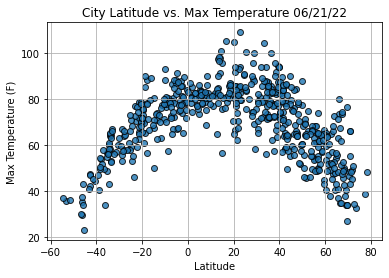

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

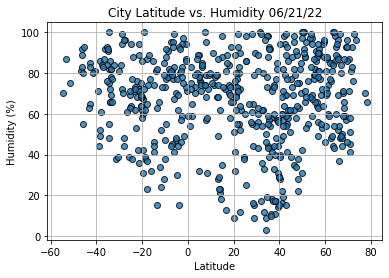

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

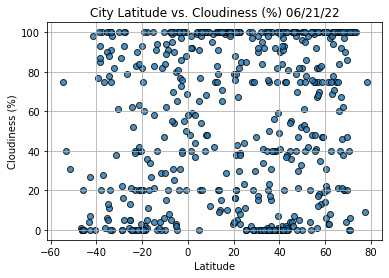

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

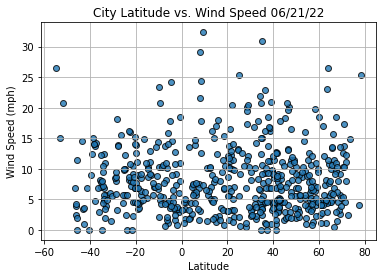

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13=city_data_df.loc[13]
index13

City                 Kruisfontein
Country                        ZA
Date          2022-06-21 14:51:04
Lat                      -34.0033
Lng                       24.7314
Max Temp                    63.88
Humidity                       72
Cloudiness                    100
Wind Speed                   4.88
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
552    False
553     True
554     True
555     True
556     True
Name: Lat, Length: 557, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2022-06-21 14:50:59,3.0707,172.7902,82.56,73,37,13.49
3,Ginda,IN,2022-06-21 14:51:00,30.6945,78.4932,67.06,56,90,3.47
4,Ust-Tsilma,RU,2022-06-21 14:51:01,65.4410,52.1498,63.18,52,100,10.00
7,Tasiilaq,GL,2022-06-21 14:51:02,65.6145,-37.6368,36.93,88,21,13.35
10,Jamestown,US,2022-06-21 14:46:45,42.0970,-79.2353,78.39,64,20,9.22
...,...,...,...,...,...,...,...,...,...
551,Amga,RU,2022-06-21 15:07:45,60.8953,131.9608,63.32,88,100,4.05
553,Kinlochleven,GB,2022-06-21 15:07:46,56.7115,-4.9661,65.28,78,100,3.06
554,Opportunity,US,2022-06-21 15:07:46,47.6499,-117.2399,64.00,75,0,1.99
555,Abu Samrah,SY,2022-06-21 15:07:46,35.3029,37.1841,77.88,39,0,30.91


In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2022-06-21 14:50:59,3.0707,172.7902,82.56,73,37,13.49
3,Ginda,IN,2022-06-21 14:51:00,30.6945,78.4932,67.06,56,90,3.47
4,Ust-Tsilma,RU,2022-06-21 14:51:01,65.4410,52.1498,63.18,52,100,10.00
7,Tasiilaq,GL,2022-06-21 14:51:02,65.6145,-37.6368,36.93,88,21,13.35
10,Jamestown,US,2022-06-21 14:46:45,42.0970,-79.2353,78.39,64,20,9.22


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

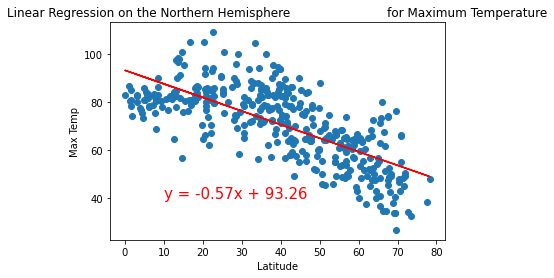

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

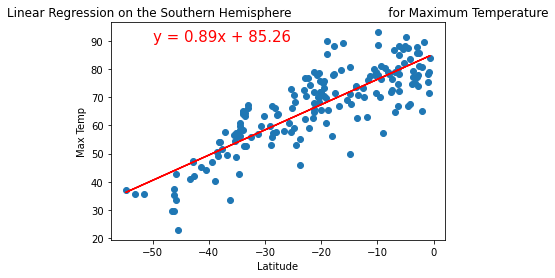

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

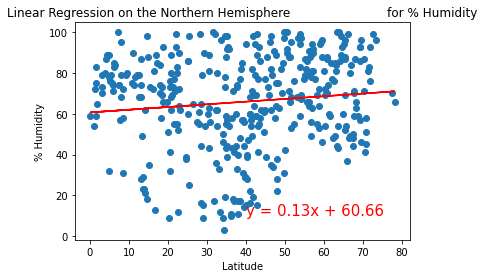

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

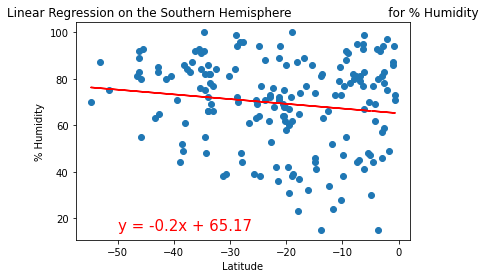

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

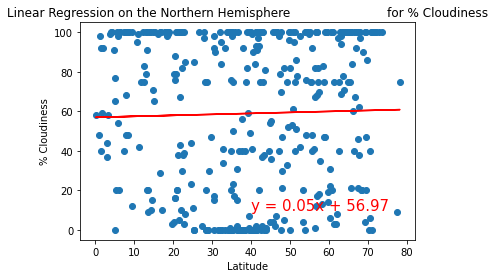

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

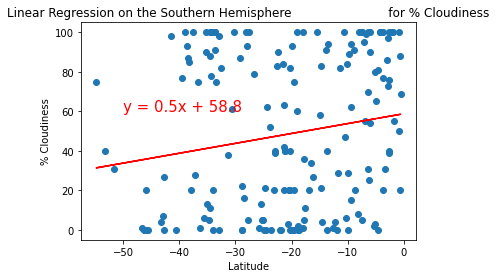

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

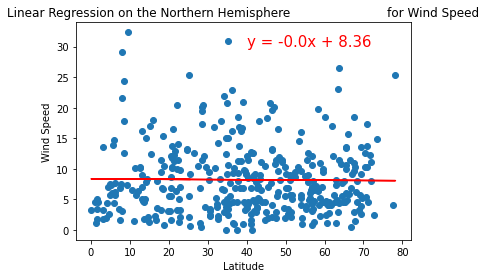

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

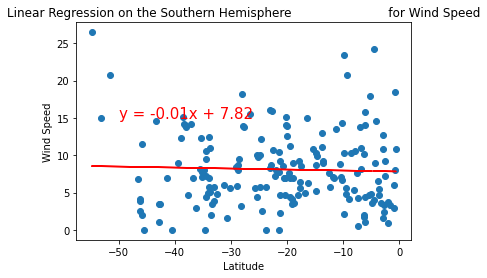

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))